#                                     PROJECT
                   Predicting sales revenue with multiple linear regression 


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

# Loading Data

In [3]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


# Relationship between Features and Response

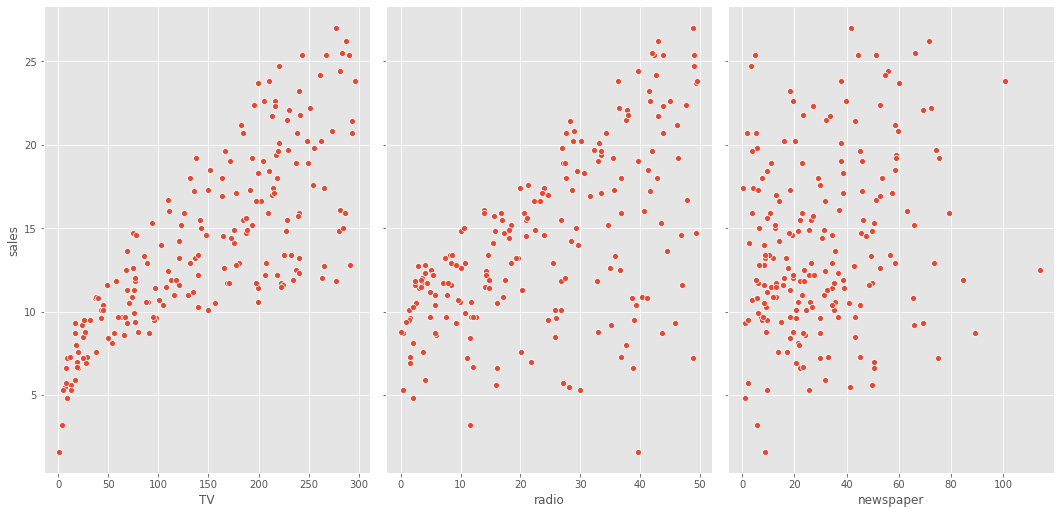

In [5]:
sns.pairplot(advert, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

# Multiple Linear Regression - Estimating Coefficients

In [6]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = advert[feature_cols]
y = advert.sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print("the intercept value is:")
print(lm1.intercept_)
print("the value of intercepts are:")
print(lm1.coef_)

the intercept value is:
2.9388893694594067
the value of intercepts are:
[ 0.04576465  0.18853002 -0.00103749]


In [7]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('TV', 0.045764645455397615),
 ('radio', 0.18853001691820445),
 ('newspaper', -0.0010374930424762174)]

<AxesSubplot:>

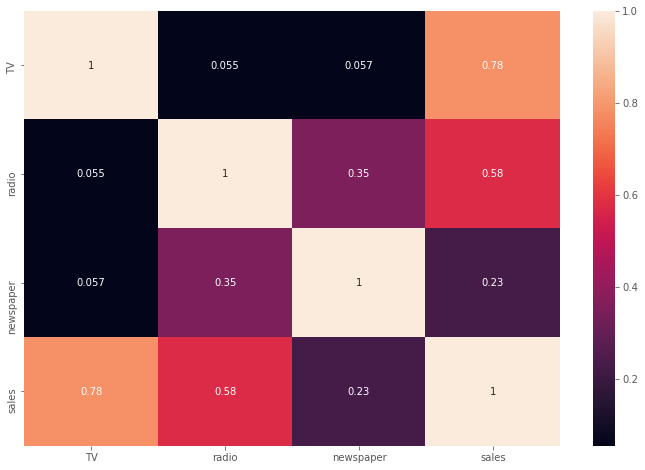

In [8]:
sns.heatmap(advert.corr(), annot=True)

# Feature Selection

In [9]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828956


In [10]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789521


# Model Evaluation Using Train/Test Split and Metrics

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.4046514230328948
R^2:  0.9156213613792233


In [19]:
mean_squared_error(y_test, lm4_preds)

1.9730456202283364

In [12]:
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 1.3879034699382882
R^2:  0.9176214942248908



# Interaction Effect (Synergy)

In [15]:
advert['interaction'] = advert['TV'] * advert['radio']

In [16]:
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 0.701187113716434
R^2:  0.978973681468126
